<a href="https://colab.research.google.com/github/revak18/nicotine_use_mathmodel/blob/main/NicotineUse_SIR_ODE_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def dSIRI_dt(y, t, B, beta, gamma, rho, mu):
    S, I, R = y
    dS_dt = B - beta * S * I - mu * S
    dI_dt = beta * S * I - (mu + gamma) * I + rho * R
    dR_dt = gamma * I - (mu + rho) * R
    return [dS_dt, dI_dt, dR_dt]


# Define parameters
B = 0.00103  # Birth rate
mu = 0.0006254  # Death rate

# Constants
# https://www.cdc.gov/tobacco/sgr/e-cigarettes/pdfs/2016_sgr_entire_report_508.pdf
# **E-cigarettes**
beta_EC = 0.18  # Infection rate (e-cigarettes)
gamma_EC = 0.05641  # Recovery rate
rho_EC = 0.076  # Relapse rate

# **Cigarettes**
beta_C = 0.003  # Infection rate (cigarettes)
gamma_C = 0.05641  # Recovery rate
rho_C = 0.076  # Relapse rate


# Define initial conditions
# E-cigarettes "Adults" and "Young Adults"
S0_EC_A = 0.9400  # Initial proportion of susceptible individuals (e-cigarettes)
I0_EC_A = 0.0600  # Initial proportion of infected individuals (e-cigarettes)
R0_EC_A = 0.0  # Initial proportion of recovered individuals (e-cigarettes)

# Cigarettes "Adults" and "Young Adults"
S0_C_A = 0.8840  # Initial proportion of susceptible individuals (cigarettes)
I0_C_A = 0.1160  # Initial proportion of infected individuals (cigarettes)
R0_C_A = 0.0  # Initial proportion of recovered individuals (cigarettes)

# E-cigarettes "Youth"
S0_EC_Y = 0.7530  # Initial proportion of susceptible individuals (e-cigarettes)
I0_EC_Y = 0.2470  # Initial proportion of infected individuals (e-cigarettes)
R0_EC_Y = 0.0  # Initial proportion of recovered individuals (e-cigarettes)

# Cigarettes "Youth"
S0_C_Y = 0.9250  # Initial proportion of susceptible individuals (cigarettes)
I0_C_Y = 0.0750  # Initial proportion of infected individuals (cigarettes)
R0_C_Y = 0.0  # Initial proportion of recovered individuals (cigarettes)


# Define time points
t = np.linspace(0, 120, 120)  # Simulate for 120 time units


def run_simulation(scenario_name, S0, I0, R0, beta, gamma, rho):
    y0 = [S0, I0, R0]
    sol = odeint(dSIRI_dt, y0, t, args=(B, beta, gamma, rho, mu))

    # Extract results
    S = sol[:, 0]
    I = sol[:, 1]
    R = sol[:, 2]
    P = np.linspace(1, 1 + (B * 120) - (mu * 120), 120)  # Total Population over time

    # Extract results at 5, and 10 years
    results_5_years = sol[59]  # 5 years * 12 months/year = 60 months
    results_10_years = sol[119]  # 10 years * 12 months/year = 120 months

    # Plot the results
    plt.figure(figsize=(5, 3))
    plt.plot(t, S, label='Susceptible')
    plt.plot(t, I, label='Infected')
    plt.plot(t, R, label='Recovered')
    plt.plot(t, P, label='Total Population')

    plt.xlabel('Time')
    plt.ylabel('Proportion of Population')
    plt.title(f'SIRI Model for Nicotine Use in {scenario_name}')
    plt.legend()
    plt.grid(True)
    return results_5_years, results_10_years

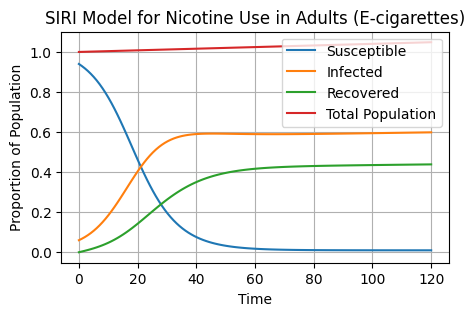

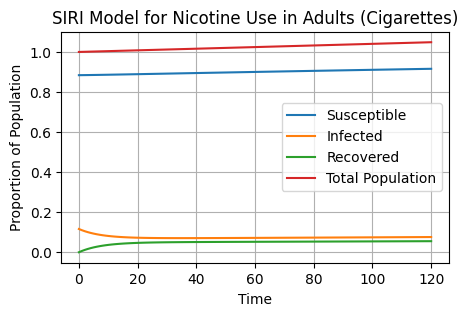

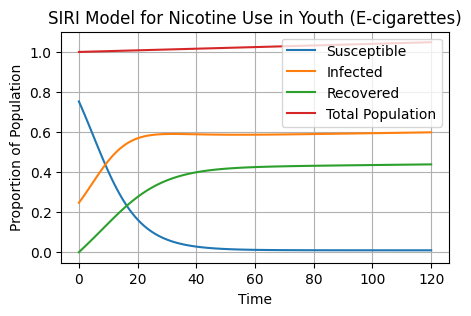

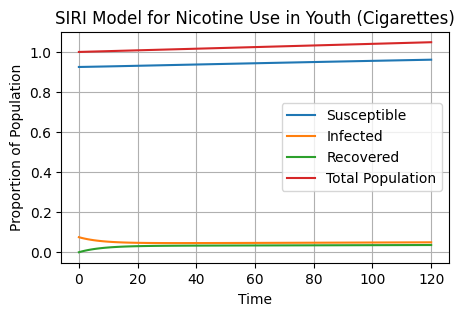

  Scenario      Time Susceptible  Infected Recovered
0     EC_A   5 Years    0.017833  0.589783  0.416014
0     EC_A  10 Years    0.009547  0.598653  0.438575
1      C_A   5 Years    0.900047  0.071565  0.052017
1      C_A  10 Years    0.915865    0.0758   0.05511
2     EC_Y   5 Years    0.011993  0.586887  0.424749
2     EC_Y  10 Years    0.009539  0.598643  0.438593
3      C_Y   5 Years    0.943343  0.046512  0.033774
3      C_Y  10 Years    0.961328  0.049497   0.03595


In [ ]:
import pandas as pd

# Run simulations and create plots for each scenario
results = {}

# Scenario 1: E-cigarettes in Adults
results["EC_A"] = run_simulation("Adults (E-cigarettes)", S0_EC_A, I0_EC_A, R0_EC_A, beta_EC, gamma_EC, rho_EC)

# Scenario 2: Cigarettes in Adults
results["C_A"] = run_simulation("Adults (Cigarettes)", S0_C_A, I0_C_A, R0_C_A, beta_C, gamma_C, rho_C)

# Scenario 3: E-cigarettes in Youth
results["EC_Y"] = run_simulation("Youth (E-cigarettes)", S0_EC_Y, I0_EC_Y, R0_EC_Y, beta_EC, gamma_EC, rho_EC)

# Scenario 4: Cigarettes in Youth
results["C_Y"] = run_simulation("Youth (Cigarettes)", S0_C_Y, I0_C_Y, R0_C_Y, beta_C, gamma_C, rho_C)

plt.show()

# Create a DataFrame to store the results
data = []
for scenario, (results_5, results_10) in results.items():
    data.append({
        'Scenario': scenario,
        'Time': ['5 Years', '10 Years'],
        'Susceptible': [results_5[0], results_10[0]],
        'Infected': [results_5[1], results_10[1]],
        'Recovered': [results_5[2], results_10[2]]
    })

df = pd.DataFrame(data)
df = df.explode(['Time', 'Susceptible', 'Infected', 'Recovered'])
#df = df.pivot_table(index=['Scenario', 'Time'], columns='variable', values='value')

print(df)

E-cigarettes vs. Cigarettes:

*   E-cigarettes show faster initiation, infection, and recovery rates in both youth and adults compared to traditional cigarettes.
*   Cigarette use demonstrates slower transitions, with lower infection rates and gradual changes in population dynamics.


*   E-cigarettes pose a greater immediate risk of rapid nicotine adoption, particularly among youth.

Youth vs. Adults:

Youth exhibit sharper declines in susceptibility and faster increases in infection and recovery rates, especially for e-cigarettes, indicating higher vulnerability.
Adults have more stable susceptible populations and slower transitions in infection and recovery, requiring longer-term interventions.

Public Health Implications:

Prevention campaigns should target youth, especially for e-cigarettes, with stricter regulations and awareness programs.
Sustained cessation support is critical for adults, particularly for cigarette users, to address slower recovery rates.
Policies must differentiate between e-cigarettes and cigarettes, focusing on rapid interventions for youth and long-term support for adults.

Scientific Conclusions
E-cigarettes vs. Cigarettes:

Faster Dynamics in E-cigarettes: E-cigarettes demonstrate faster rates of initiation, infection, and recovery in both youth and adult populations compared to traditional cigarettes.
Higher Susceptibility in Youth for E-cigarettes: Youth populations are more vulnerable to e-cigarette use, as evidenced by a sharp decline in the susceptible population and rapid growth in the infected population.
Slower Transition for Cigarettes: Traditional cigarette use shows much slower transitions between compartments, reflecting lower initiation rates and less dynamic recovery patterns.
Youth vs. Adults:

Higher Dynamics in Youth: Youth exhibit faster infection and recovery rates for both e-cigarettes and cigarettes, highlighting their vulnerability to nicotine products and responsiveness to interventions.
Stable Patterns in Adults: Adults show slower dynamics, with more stable susceptible populations and gradual changes in the infected and recovered compartments.
Public Health Implications:

Targeting Youth for E-cigarette Prevention: The sharp dynamics in youth e-cigarette use underscore the need for targeted prevention campaigns, stricter regulations, and education about the risks.
Cessation Support for Adults: Slower recovery rates for cigarettes in adults suggest a need for sustained cessation support and long-term interventions.
Policy Differentiation: Policies should differentiate between e-cigarettes and traditional cigarettes, focusing on rapid-response interventions for e-cigarettes and sustained support for cigarette cessation.

**Sensitivity Analysis**

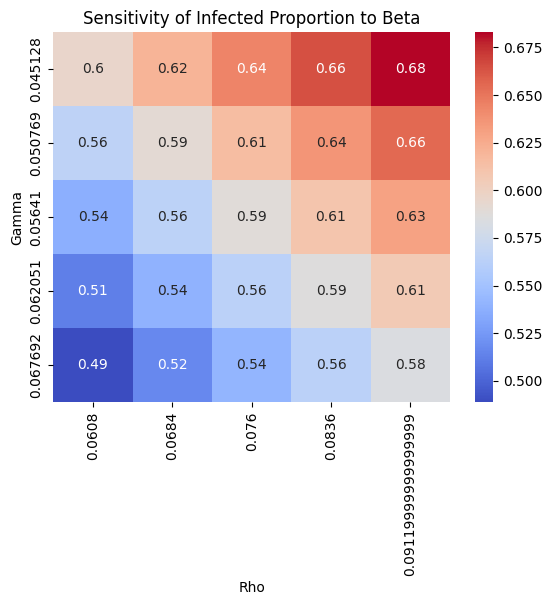

In [32]:
#Runs the SIRI model simulation and returns the proportion of infected individuals at 5 years.
def run_simulation(S0, I0, R0, beta, gamma, rho):
    y0 = [S0, I0, R0]
    t = np.linspace(0, 60, 60)  # Simulate for 5 years (60 months)

    sol = odeint(dSIRI_dt, y0, t, args=(B, beta, gamma, rho, mu))
    return sol[-1, 1]  # Return the proportion of infected individuals at the end of the simulation

# Define parameter ranges for sensitivity analysis
beta_range = np.linspace(beta_EC * 0.8, beta_EC * 1.2, 5)  # Vary beta_EC by +/- 20%
gamma_range = np.linspace(gamma_EC * 0.8, gamma_EC * 1.2, 5)  # Vary gamma_EC by +/- 20%
rho_range = np.linspace(rho_EC * 0.8, rho_EC * 1.2, 5)  # Vary rho_EC by +/- 20%

# Create empty lists to store results
results_5_years_sensitivity = []

# Perform sensitivity analysis
for beta_val in beta_range:
    for gamma_val in gamma_range:
        for rho_val in rho_range:
            # Run simulation with perturbed parameters
            infected_prop = run_simulation(S0_EC_A, I0_EC_A, R0_EC_A, beta_val, gamma_val, rho_val)
            results_5_years_sensitivity.append([beta_val, gamma_val, rho_val, infected_prop])

# Convert results to a DataFrame for easier analysis
df_sensitivity = pd.DataFrame(results_5_years_sensitivity, columns=['beta', 'gamma', 'rho', 'Infected_Proportion'])

# Analyze and visualize results
# Example: Calculate mean infected proportion for each parameter combination
df_sensitivity_mean = df_sensitivity.groupby(['beta', 'gamma', 'rho']).mean().reset_index()

# Example: Create a heatmap to visualize sensitivity to beta
import seaborn as sns
sns.heatmap(df_sensitivity_mean.pivot_table(index='gamma', columns='rho', values='Infected_Proportion'),
            cmap='coolwarm', annot=True)
plt.xlabel('Rho')
plt.ylabel('Gamma')
plt.title('Sensitivity of Infected Proportion to Beta')
plt.show()

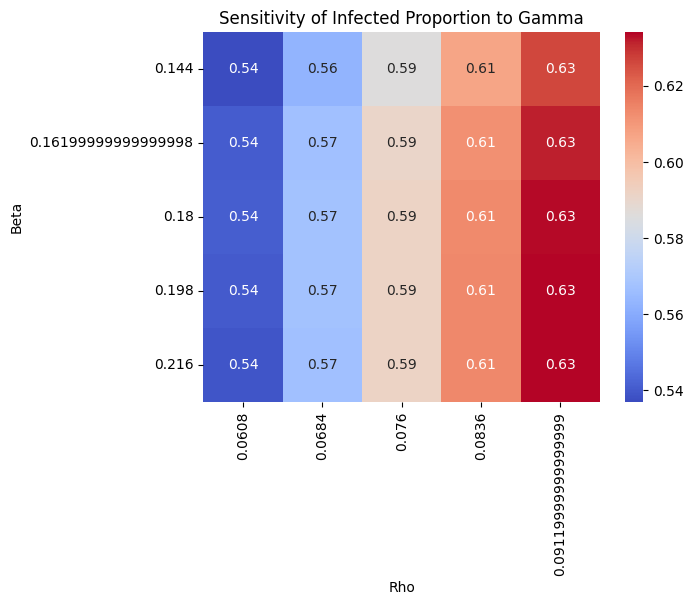

In [33]:
# Example: Create a heatmap to visualize sensitivity to gamma
import seaborn as sns
sns.heatmap(df_sensitivity_mean.pivot_table(index='beta', columns='rho', values='Infected_Proportion'),
            cmap='coolwarm', annot=True)
plt.xlabel('Rho')
plt.ylabel('Beta')
plt.title('Sensitivity of Infected Proportion to Gamma')
plt.show()

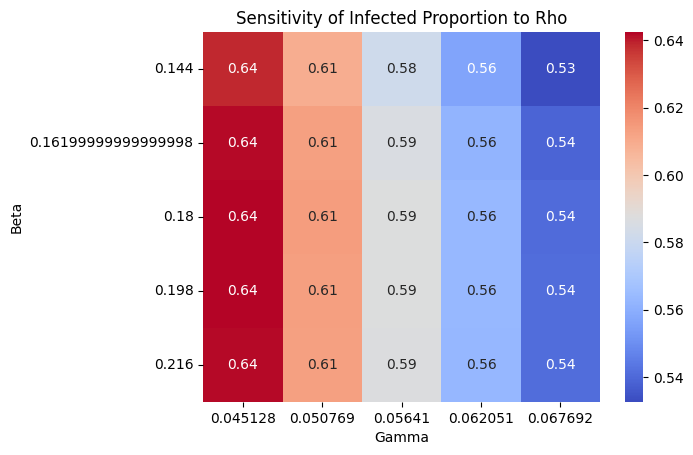

In [34]:
# Example: Create a heatmap to visualize sensitivity to rho
import seaborn as sns
sns.heatmap(df_sensitivity_mean.pivot_table(index='beta', columns='gamma', values='Infected_Proportion'),
            cmap='coolwarm', annot=True)
plt.xlabel('Gamma')
plt.ylabel('Beta')
plt.title('Sensitivity of Infected Proportion to Rho')
plt.show()

In [35]:
!pip install SALib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.1 MB/s eta 0:00:00


<ipython-input-37-e221fd0fe813>:15: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)  # Adjust sample size as needed


             ST   ST_conf
beta   0.001569  0.000215
gamma  0.552210  0.049166
rho    0.447986  0.035622
             S1   S1_conf
beta   0.001572  0.003537
gamma  0.549043  0.064560
rho    0.445133  0.052284
                     S2   S2_conf
(beta, gamma) -0.000161  0.006359
(beta, rho)    0.000229  0.005678
(gamma, rho)   0.006707  0.096790
Mean Infected Proportion: 0.5885837175417143
Standard Deviation: 0.039742144084065956


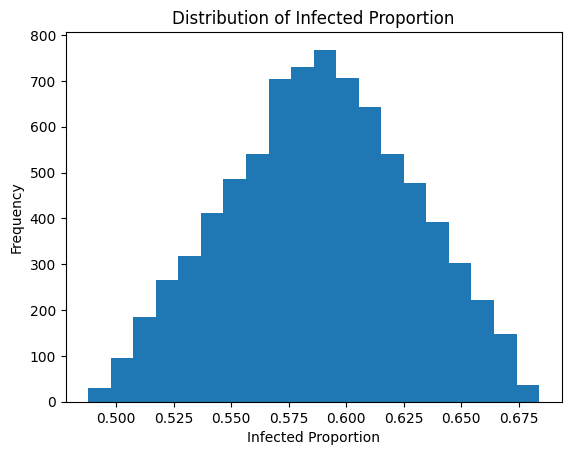

In [37]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np

# Define parameter bounds for sensitivity analysis
problem = {
    'num_vars': 3,
    'names': ['beta', 'gamma', 'rho'],
    'bounds': [[beta_EC * 0.8, beta_EC * 1.2],
              [gamma_EC * 0.8, gamma_EC * 1.2],
              [rho_EC * 0.8, rho_EC * 1.2]]
}

# Generate Sobol' sequences for sampling
param_values = saltelli.sample(problem, 1000)  # Adjust sample size as needed

# Run simulations for each parameter combination
results = []
for params in param_values:
    beta_val, gamma_val, rho_val = params
    infected_prop = run_simulation(S0_EC_A, I0_EC_A, R0_EC_A, beta_val, gamma_val, rho_val)
    results.append(infected_prop)

# Convert results to a NumPy array
results = np.array(results)

# Calculate Sobol indices
Si = sobol.analyze(problem, results, print_to_console=True)

# Print summary statistics
print("Mean Infected Proportion:", np.mean(results))
print("Standard Deviation:", np.std(results))

# Visualize results (e.g., histograms, scatter plots)
plt.hist(results, bins=20)
plt.xlabel("Infected Proportion")
plt.ylabel("Frequency")
plt.title("Distribution of Infected Proportion")
plt.show()